This is the code to predict MNIST handwritten digits dataset using Deep neural network

Followed the tutorial found in: https://www.kaggle.com/poonaml/digit-recognizer/deep-neural-network-keras-way

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

/home/malli/miniconda3/envs/neuralnetwork/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from subprocess import check_output
print (check_output(["ls", "../input"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [3]:
train = pd.read_csv("../input/train.csv")

In [4]:
test = pd.read_csv("../input/test.csv")

In [5]:
X_train = (train.iloc[:,1:].values).astype('float32')
Y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

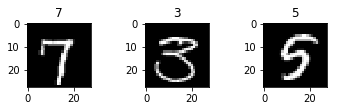

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i])

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return ((x - mean_px) / std_px)

In [9]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
num_classes = Y_train.shape[1]
num_classes

10

In [10]:
seed = 43
np.random.seed(seed)

In [11]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

print("input shape: ", model.input_shape)
print("output shape: ", model.output_shape)

input shape:  (None, 28, 28, 1)
output shape:  (None, 10)


In [18]:
model.compile(optimizer=RMSprop(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
from keras.preprocessing import image

gen = image.ImageDataGenerator()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, Y_train, batch_size=64)
val_batches=gen.flow(X_val, Y_val, batch_size=64)

In [25]:
history=model.fit_generator(batches, batches.n, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.n)

Epoch 1/5
   40/30618 [..............................] - ETA: 2:08 - loss: 0.4073 - acc: 0.9613

/home/malli/miniconda3/envs/neuralnetwork/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/home/malli/miniconda3/envs/neuralnetwork/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 30618, validation_data=<keras.pre..., epochs=5, validation_steps=3402)`
  """Entry point for launching an IPython kernel.


30618/30618 [==============================] - 121s 4ms/step - loss: 0.3981 - acc: 0.9607 - val_loss: 1.2017 - val_acc: 0.9074
Epoch 2/5
30618/30618 [==============================] - 122s 4ms/step - loss: 0.3866 - acc: 0.9627 - val_loss: 1.2176 - val_acc: 0.9062
Epoch 3/5
30618/30618 [==============================] - 126s 4ms/step - loss: 0.3764 - acc: 0.9643 - val_loss: 1.2269 - val_acc: 0.9083
Epoch 4/5
30618/30618 [==============================] - 138s 5ms/step - loss: 0.3702 - acc: 0.9655 - val_loss: 1.2915 - val_acc: 0.9036
Epoch 5/5
30618/30618 [==============================] - 136s 4ms/step - loss: 0.3655 - acc: 0.9665 - val_loss: 1.2688 - val_acc: 0.9074


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
predictions = model.predict_classes(X_test, verbose=0)
submissions = pd.DataFrame({"ImageId": list(range(1, len(predictions)+1)), "Label": predictions})
submissions.to_csv("PredictionResult.csv", index=False, header=True)